## SVM with linearly seperable data (SVC) (blog post)
(SVM doesn't deal with probability of being in each class, like we say in logistic regression and Naive Bayes classification, it deals with exactness)
(if not linearly seperable, you just use kernel functions to make it into a linearly seperable data, and then use these concepts)

### BASIC IDEA
SVM with linearly seperable data, i.e. it can be seperated into two parts by a hyperplane, then SVM will fit a SVC into the data, by method given below. If however the data is not linearly seperable (maybe due to complex decision boundary) we can apply kernel functions to increase dimensions of the data such that we can now make the data linearly seperable and fit an SVC into that!!

If we are able to find a boundary that splits the two class means, it is said to be linearly separable data.

SVM classifies two classes using a hyperplane. Hyperplanes are decision boundaries that classify data

SVM algorithm finds the best hyperplane that goes in the middle of the two classes with a maximum margin on both sides.

#### Support Vectors

THE DATA POINTS CLOSEST TO THE HYPERPLANE IN BOTH THE OBSERVATIONS ARE KNOWN AS SUPPORT VECTORS. If a data point which is a support vector is removed, then the position of the hyperplane is changed. If a data point that is not a support vector is removed, it has no effect on the model.


## Math behind SVM
The basic principle behind SVM is we want to draw a hyperplane with a maximum margin that separated two classes.
Suppose we want to separate two classes C1 and C2 by using SVC in two-dimensional space. Then we want to predict the class of unknown feature vector X as either Class C1 or Class C2.
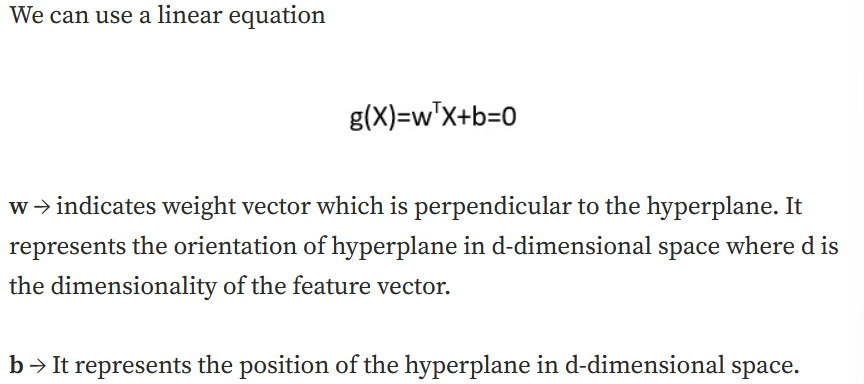

For every feature vector, we want to calculate W and b such that:
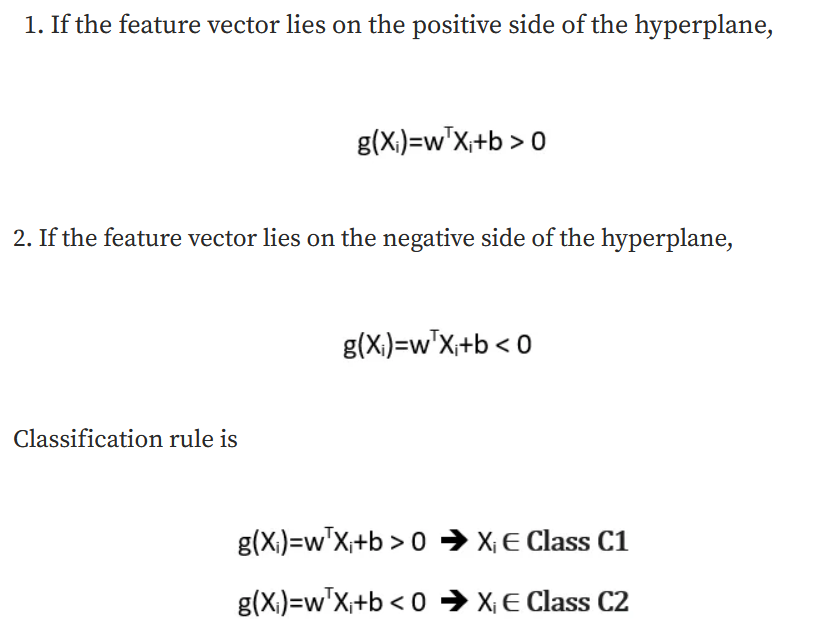

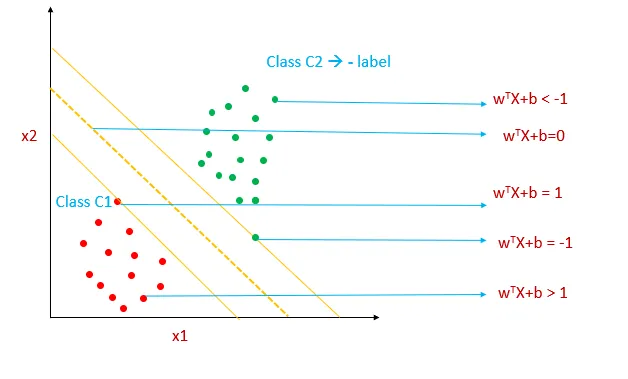

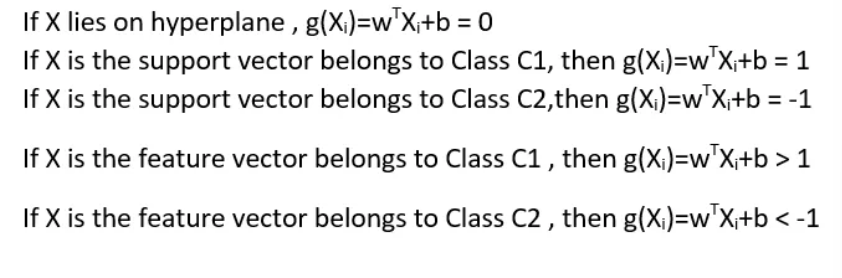

At a unit distance from the hyperplane are the support vectors!

So during fitting of the data into the SVM, we calculated parameters w and b and found the best hyperplane such that: for all points on hyperplane g(X) = 0 (obviously), for support vectors, |g(X)| = 1 and for other vectors belonging to any class |g(X)|>1.


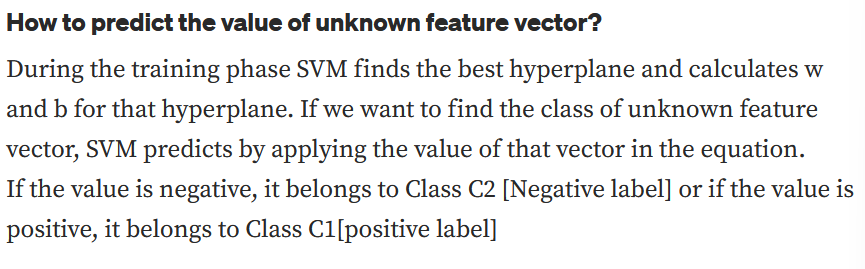


## How to find/fit best hyperplane?
Start with some random values of w and b and check for missclassifications, rotate the hyperplane, by changing w and b to account for those wrong classifications by sending them to the correct side.
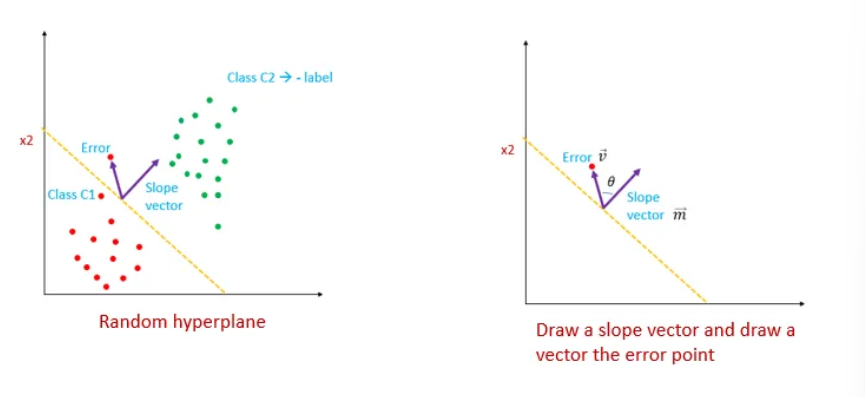

To push the vector v below the hyperplane, we need to rotate such that we increase the angle between the error vector and slope vector (to be more than 90 degrees). One way to do this is shown below:
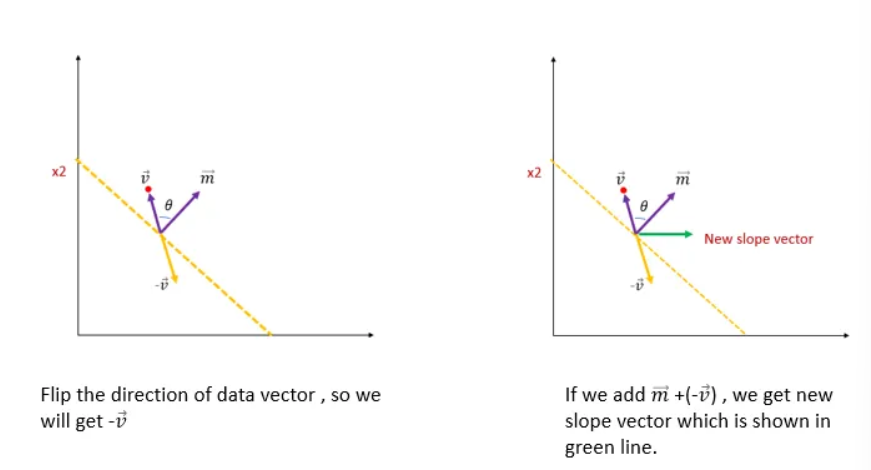

So after accounting for all missclassifications, we get:
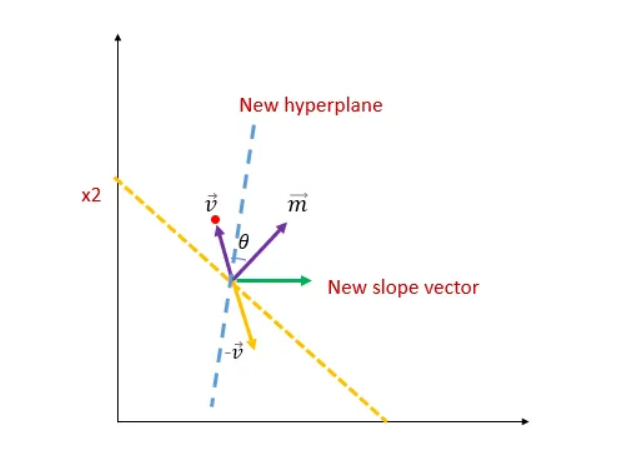

And finally we will have a SVM that classifies both classes correctly!

### How do you maximise the margin?
Now, that you've fit a hyperplane to seperate the classes, you will need to increase the margin to make sure that it can classify new features more accurately!
To do this, we will find all possible range of hyperplanes that seperate the training data correctly into the classes. And for each of those hyperplanes find w and d (d is the margin), and sort by valu of d!


# SVM (Support Vector Machines) (Video Playlist)

SVM is a very very good and robust algorithm. It was conceptualised in late 90's and since then it has seen various applications in combination with random forests. SVM improves on idea of logistic regression!

Linearly Seperable Data: You can draw a line to seperate the data points into required classes
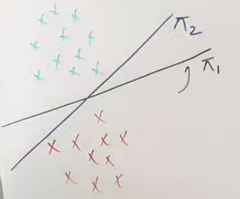
Both the hyperplanes are the same for logistic regression, however for SVM L1 is better (think reason)

SVM tries to segregate the data using a hyperplane but while making sure the margin is as large as possible!

SVM == CLASSIFY POINTS AS WIDELY AS POSSIBLE

#### SELECTING BEST HYPERPLANE
In SVC, we are trying to find the margin maximising hyperplane.
You select a hyperplane (That performs classification well) and draw hyperplane in one direction in parallel direction till you touch the first observation of class 1, say L+
similarly go parallely in opposite direction and find L- as soon as you encounter the first observation of the second class.
Now calculate margin (min of distance between L and L+, L and L-), and repeat this for all the hyperplanes that categorise correctly for training data. Now select that hyperplane for which margin is largest!

Algorithm: Maximise d (as a function of w, b)

#### Concept of support vectors
Support vectors are the vectors that are first encountered by L+ and L-

#### Benefit of using SVM
1) Support Vector Machines are very robust to outliers!
2) They are good at dealing with non linear data distribution
3) SVM's can be implemented for both classification and regression

#### Equation of a hyperplane
Hyperplane:- n-1 dimensional subspace in n dimensional space

# g(X) = w.T*x + b = 0

example:
1) in 1 dimension: w1x1 + w0 = 0, i.e. a point
2) in 2 dimension: w1x1 + w2x2 + w0 = 0 i.e. a line
... etc



Note: in higher dimension, hyperspaces are represented using pi/ but for ease I will write L.

Now, while computation, we will assume b = 0
So we will have

w.T*x = 0

What is w? A vector perpendicular to the hyperplane

### Mathematics of Hard Margin SVM
We are trying to minimise the margin, which is calculated by moving parallel to L.
We have to find this decision boundary.

#### Decision Rule for New points
We also have to define what is the decision rule for defining the class to which a new vector belongs. 
For a new point (new feature to be classified into positive or negative), now this point is also a vector. You find the projection of u (new vector) on w, Now w.T*u. If w.T*u - c >= 0. Where c is some constant determining distance of the decision boundary from origin which can be replaced with -b to get: w.T*u + b >= 0: THIS IS THE DECISION RULE FOR CLASSYFYING NEW POINTS, which classifies into one of the two classes
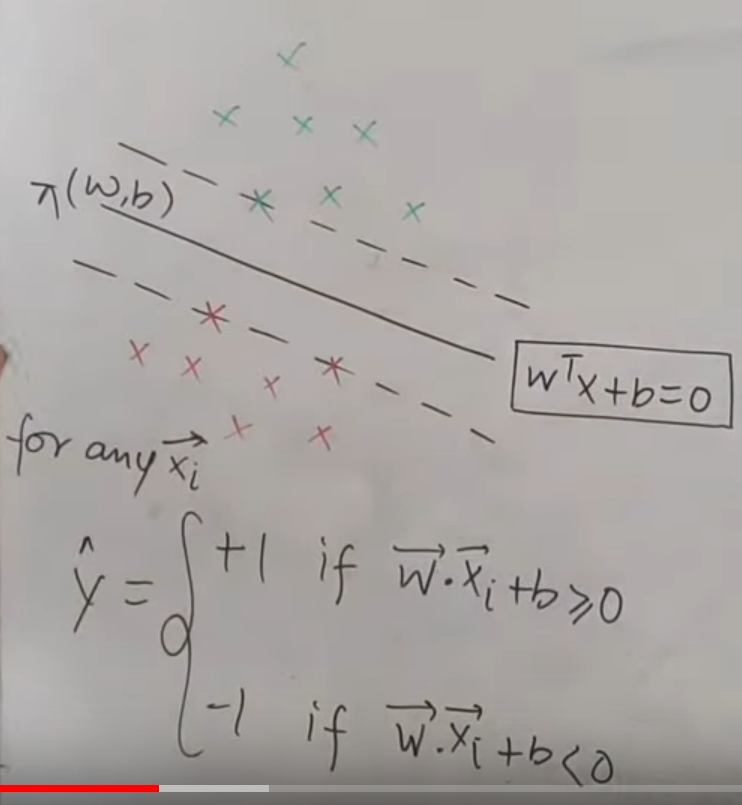

#### To find w and b
We will find d, and maximimse that d w.r.t w and b (USING GRAD. ASCENT)
Assumption: L+ = wT*x + b = 1
L- = wT*x + b = -1

If ever confusion: https://www.youtube.com/watch?v=yCAlHPDgWtM&list=PLKnIA16_RmvbOIFee-ra7U6jR2oIbCZBL&index=3
about mathematical implementation, and why do we take +-1 and how that can account for any L+ and L-

Since changing the value of w also change d!

Changing w and b (by a factor more than 1 shrinks boundary, by a factor less than 1 expands boundary)

Now we have to do gradient descent such that, we have to maximise d, as a function of w and b!

But before optimising d, we have to make sure the classification done is correct! i.e. the constraint in the system is that classification always remains correct

So we have to write these constraints mathematically:

for all points of class 1:
w.T*x + b >= 1 for all these points

for all points of class 2:
w.t*x + b <= -1 for all those points

simply put at the end of the day we are trying to find a decision boundary with the maximum margin

These constraints can be rewritten as:
set for all points in class 1: yi = +1 and for all points in class 2: yi = -1

So yi(wT*xi + b) >= 1 for all points! is the common constraint for all feature points

The equality will be true for support vectors
So, our final goal is:

Maximise d, as a function of w and b, constraint to yi(wT*xi + b) >= 1

When we solve this problem we will get: (derivation in video linked)
Considering x2 and x1 to be points on L+ and L- hyperplane
d = (x2 - x1).w/||w||

d = (x2.w - x1.w)/||w||

d = ((1-b)-(-b-1))/||w||

d = 2/||w|| --> We have to maximimse this s.t. yi(w.T*xi + b) >= 1

#### THIS WAS HARD MARGIN SVN

The thing is this formulation is extremely limited to Hard Margin SVM Cases with linear seperation between data. If there were a single class 2 point in region of class 1 this formulation wont work. So we have to implement 
Soft Margin SVM (for almost linearly seperable data)

### IMPLEMENTATION OF HARD MARGIN SVM

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [64]:
# We have a perfectly linear dataset avalaible in sklearn
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=2000, centers = 2, random_state=26981, cluster_std = 0.60)

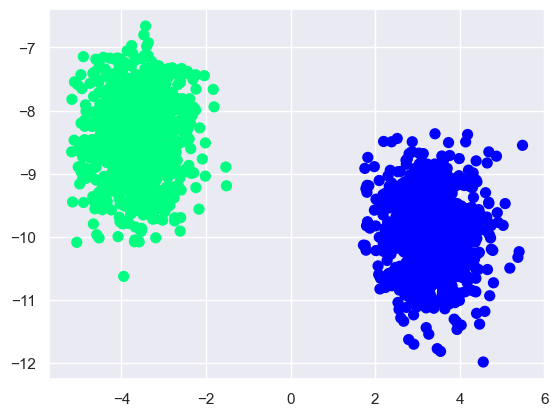

In [65]:
plt.scatter(x[:,0],x[:,1], c = y, s=50, cmap="winter")

In [66]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [67]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    #Plotting 2d SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Creating Grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    
    #Plotting decision boundary and margins
    ax.contour(X,Y,p, colors='k', levels=[-1,0,1], alpha = 0.5, 
               linestyles = ['--','-','--'])
    
    #Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors='None')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

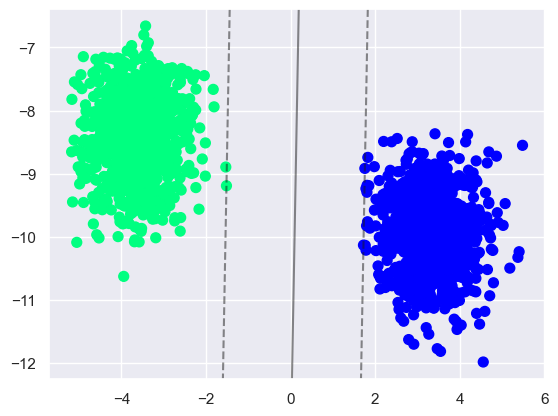

In [68]:
plt.scatter(x[:,0],x[:,1], c = y, s=50, cmap="winter")
plot_svc_decision_function(model)

SVM Completely depends on support vectors, just cares about support vectors

### Mathematics of Soft Margin SVM
Soft Margin SVM is used for almost linearly seperable data, i.e. some data points from one region enters into another region

For Hard Margin SVM: the condition for training the model was

argmax(2/||w||) w.r.t w and b, s.t. yi(wT*xi + b) >= 1


i.e. it will not allow any missclassifications

But that's not always possible especially if data points enter into one another's region a bit, to account for that, we do soft margin SVN, especially real life data sets have outliers towards the other class.

(Note: Max F(x) is equivalent to Min 1/F(x))

Essentially all we do is change our cost function s.t.

we are trying to minimise

||w||/2 + c*summation from i=1 to n of ζi

Now for each point we are calculating ζi and also trying to minimise it and find w and b

ζi = 0 for correctly classified points

For missclassified points which are the error points for our model, for them

ζi = distance from correct hyperplane! (i.e. for an incorrectly classified point of class 1 present in class 2, you take the distance of the point from the support vector hyperplane of class 2

And now we're trying to minimise these distances or these errors.

So, lost function of SVM is a combination of two things, first is margin error and second term is classification error. remember that margin error is inversely proportional to d.

c --> Hyperparameter

For very large c, classification matter more, d doesn't matter misclassification matters

For very small c, classification doesn't matter, focus on margin size

Optimised value of c is found by cross validation

Also note that, SVM error has, ||w||/2 this part is regularisation part (THINK) and the second part is called hinge loss

### NON LINEAR DATA CLASSIFICATION (KERNEL TRICK)
Using kernel method, increasing dimensionality to convert non-linear into linear

For non linearly distributed data, using kernel function we convert the data from lower feature space to a higher feature space.
The function applied is called Kernel.
There are many kernel functions, some common ones are RBF (Radial Basis Function), Polynomial, Sigmoid(which was essentially Logistic Regression)

The function applying is called kernel transformation

example: for concentric data distribution you can apply f(x) = e^(-x^2) (example of RBF)

The kernel function to use can be found out using gridsearchCV

# APPLICATION OF KERNEL TRICK ON NON LINEAR DATA CLASSIFICATION

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

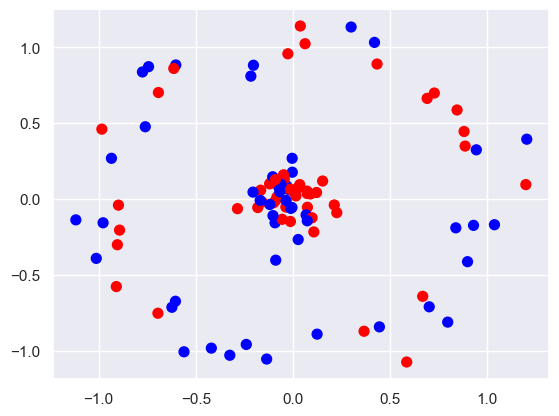

In [71]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=0.1)

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='bwr')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [88]:
linear_classifier = SVC(kernel='linear')

In [89]:
linear_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [90]:
y_pred= linear_classifier.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

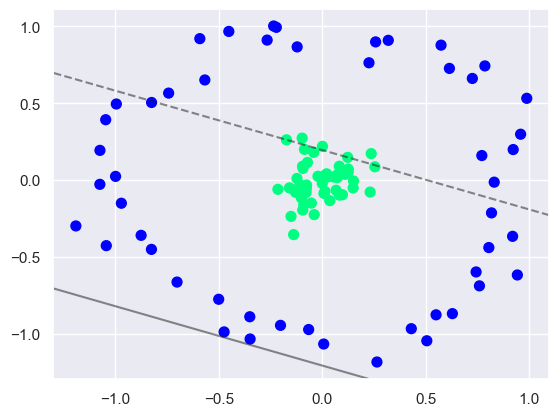

In [92]:
plt.scatter(X[:,0],X[:,1], c = y, s=50, cmap="winter")
plot_svc_decision_function(linear_classifier)

In [93]:
# Obviously linear classifier would suck in this case

In [96]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_11296\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


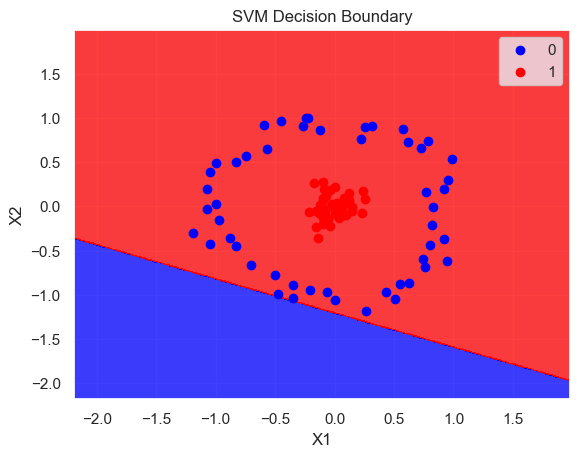

In [97]:
plot_decision_boundary(X,y,linear_classifier)

In [98]:
#Transforming Data

In [102]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1)) #Example of RBF
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

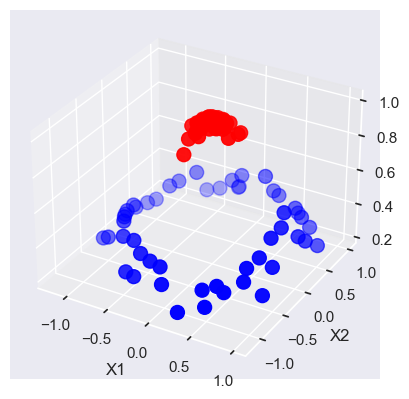

In [103]:
plot_3d_plot(X,y)

In [104]:
#Now we can create a decision boundary using SVC

In [105]:
#If however the center of the data was somewhere else, SVM can go through
#all the data points and apply RBF there to check where the SVC
#gives most accuracy
#Remember always that we are not actually applying this transformation
#and creating new feature, instead the algorithm simulates what would happen
#if it were to create a new feature (KERNEL TRICK)

In [108]:
rbf_classifier = SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)

SVC()

In [111]:
y_pred = rbf_classifier.predict(X_test)

In [112]:
accuracy_score(y_pred,y_test)

1.0

C:\Users\adars\AppData\Local\Temp\ipykernel_11296\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


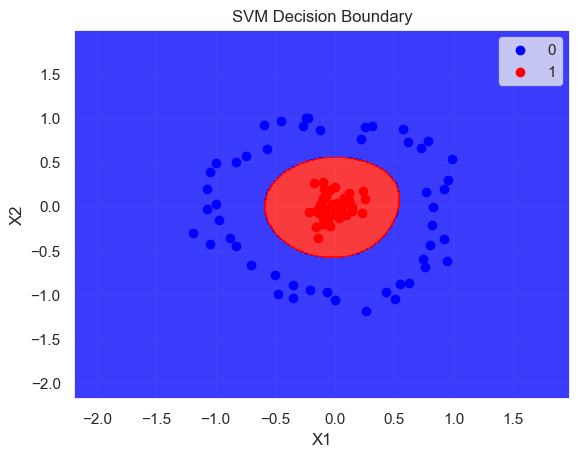

In [113]:
plot_decision_boundary(X,y,rbf_classifier)

You can also use polynomial kernel trick, and use gridsearchCV techniques to find optimum value of degree for best accuracy_score